<a href="https://colab.research.google.com/github/anafer25/Image-Denoising/blob/main/MCMC_imageDenoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Image Denoising and The Ising Model***

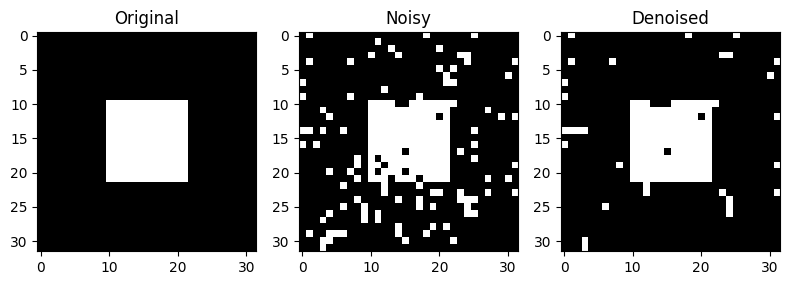

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# creating the original binary image, where 0 = black and 1 = white
size = 32
image = np.zeros( ( size, size ), dtype = np.int8 )
image[10:22, 10:22] = 1 # central white square

# add noise by flipping pixels randomly
noiseLevel = 0.1 # 10% of the pixels are flipped randomly
noisyImage = np.copy( image )
flip = np.random.rand( size, size ) < noiseLevel
noisyImage[flip] = 1 - noisyImage[flip]

# parameters
beta = 1.2  # neighbor influence
pi = 0.1    # assumed noise probability
gamma = 0.5 * np.log( ( 1 - pi ) / pi ) # trust in observed data
T = 10000   # number of MCMC iterations

# pad the image to avoid edge issues
imgDenoised = np.copy( noisyImage )

# randomly select a pixel
for t in range( T ):
    i, j = np.random.randint( 1, size - 1 ), np.random.randint( 1, size - 1 )

    # neighbor influence sum
    neighborSum = ( imgDenoised[ i + 1, j ] + imgDenoised[ i - 1 , j ] +
                    imgDenoised[ i, j + 1 ] + imgDenoised[ i, j - 1 ] )

    # Ising model: convert pixel values to spins {0,1} -> {-1,+1}
    s = 2 * imgDenoised[ i, j ] - 1  # 0 -> -1 and 1 -> +1
    obs = 2 * noisyImage[ i, j ] - 1 # observed pixel

    # Ising energy difference function
    deltaE = 2 * s * ( beta * ( neighborSum - 2 ) + gamma * obs )

    # accept / reject flip
    if deltaE < 0 or np.random.rand( ) < np.exp( - deltaE ):
        imgDenoised[ i, j ] = 1 - imgDenoised[ i, j ]

# plot
plt.figure( figsize=( 8, 3 ) )
plt.subplot( 1, 3, 1 )
plt.imshow( image, cmap='gray' )
plt.title( 'Original' )

plt.subplot( 1, 3, 2 )
plt.imshow( noisyImage, cmap='gray' )
plt.title( 'Noisy' )

plt.subplot( 1, 3, 3 )
plt.imshow( imgDenoised, cmap='gray' )
plt.title( 'Denoised' )

plt.tight_layout( )
plt.show( )

1. Bayesian image denoising:
      - the idea is to model the prior on image smoothness (neighboring pixels should agree)
      - the likelihood comes from how much a pixel agrees with the noisy image

2. Ising model for binary images:
      - each pixel is like a magnetic spin
      - neighboring spins tend to align

3. Metropolis - Hastings Algorithm:
      - a standard MCMC technique to sample from a probability distribution
      - accepts or rejects changes based on energy difference